# Lab 4: Titanic Fare Prediction - Regression Analysis
**Author:** Kate Huntsman
**Date:** April 1, 2025  
**Objective:** Explore and analyze the factors influencing passenger fare on the Titanic using various regression models, including linear regression, regularized models (Ridge and ElasticNet), and polynomial regression, while evaluating model performance and addressing challenges like skewness and outliers in the fare data.

## Introduction:
This notebook aims to explore the relationships between various features on the Titanic dataset and their influence on passenger fare. The dataset includes multiple attributes such as age, family size, passenger class, and other demographic and travel details, which can provide insights into the factors that contributed to the price of the ticket. The primary goal is to build and evaluate multiple regression models, including linear regression, regularized models (Ridge and ElasticNet), and polynomial regression, to predict the fare of passengers based on these features.

Throughout this analysis, we will assess the performance of each model using metrics like R², RMSE, and MAE, and investigate whether adding more complex features or using different modeling techniques leads to improved predictions. We will also discuss the challenges faced during the modeling process, such as the presence of skewed data and outliers, and suggest potential next steps for further improvement. The ultimate aim is to develop a deeper understanding of the factors influencing fare prediction and to determine the best model for this task.

## Section 1: Import and Inspect the Data

In [72]:
# Import necessary libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [73]:
# Load Titanic dataset
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Section 2: Data Exploration and Preparation

In [74]:
# Handling missing values and feature engineering
titanic['age'].fillna(titanic['age'].median(), inplace=True)
titanic = titanic.dropna(subset=['fare'])
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

# Optional: Convert categorical features (if needed)
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})

/var/folders/lr/4whsggrn38sckt88gcfvgqmr0000gn/T/ipykernel_59409/2359754903.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


## Section 3: Feature Selection and Justification

In [75]:
from sklearn.preprocessing import LabelEncoder

# Defining input features for regression analysis
# Case 1: age
X1 = titanic[['age']]
y1 = titanic['fare']

# Case 2: family_size
X2 = titanic[['family_size']]
y2 = titanic['fare']

# Case 3: age, family_size
X3 = titanic[['age', 'family_size']]
y3 = titanic['fare']

# Case 4: 'age, pclass, sibsp, sex, embarked'
# Encoding 'sex' (already done as label encoding)
titanic['sex'] = LabelEncoder().fit_transform(titanic['sex'])

# One-hot encode 'embarked' feature (dummies for categorical 'embarked')
titanic = pd.get_dummies(titanic, columns=['embarked'], drop_first=True)

X4 = titanic[['age', 'pclass', 'sibsp', 'sex', 'embarked_Q', 'embarked_S']]
y4 = titanic['fare']

## Reflection:
1. Why might these features affect fare?
The features in the dataset that influence a passenger's fare include factors like class (Pclass), age, and the type of ticket purchased. Higher classes (e.g., Pclass 1) tend to have higher fares, while lower classes (e.g., Pclass 3) generally have lower fares. The age of the passenger might also influence fare, as some fares are discounted for children or adjusted for certain age ranges. Additionally, the embarkation location (Embarked) could be linked to the distance traveled or ticket pricing.

2. List all available features:
PassengerId, Pclass, Name, Sex, Age, SibSp (number of siblings/spouses aboard),Parch (number of parents/children aboard), Ticket, Fare, Cabin, Embarked

3. Which other features could improve predictions and why:
Sex: Gender-based pricing or discounts could affect the fare.

Pclass: The passenger class typically correlates with ticket prices.

SibSp and Parch: The number of family members aboard may affect the type of fare paid, as some tickets include group discounts.

Cabin: This could indicate the location of the passenger's seat, potentially affecting the fare (e.g., cabins in a better location may cost more).

Embarked: The embarkation port might influence ticket prices based on distance traveled.

4. How many variables are in your Case 4: 
4 features being used to predict the fare: Age, Pclass, SibSp, and Embarked.

5. Which variable(s) did you choose for Case 4 and why do you feel those could make good inputs:
I chose Age, Pclass, SibSp, and Embarked because:

Age: It may influence the price based on discounts or pricing strategies.

Pclass: This directly correlates with the fare, as higher-class passengers usually pay more.

SibSp: The presence of family members can influence the type of ticket and fare.

Embarked: It provides geographical context, which could indicate different pricing structures for different ports.

## Section 4: Train a Regression Model (Linear Regression)
### 4.1 Split the Data

In [76]:
from sklearn.model_selection import train_test_split

# Split data for all four cases
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)

### 4.2 Train and Evaluate Linear Regression Models (all 4 cases)

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Initialize Linear Regression model and train for each case
lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)
lr_model4 = LinearRegression().fit(X4_train, y4_train)

# Predictions for each case
y_pred_train1 = lr_model1.predict(X1_train)
y_pred_test1 = lr_model1.predict(X1_test)

y_pred_train2 = lr_model2.predict(X2_train)
y_pred_test2 = lr_model2.predict(X2_test)

y_pred_train3 = lr_model3.predict(X3_train)
y_pred_test3 = lr_model3.predict(X3_test)

y_pred_train4 = lr_model4.predict(X4_train)
y_pred_test4 = lr_model4.predict(X4_test)

# Optionally, print the results for each case
from sklearn.metrics import r2_score

print("Case 1 (age):")
print(f"Training R²: {r2_score(y1_train, y_pred_train1)}")
print(f"Test R²: {r2_score(y1_test, y_pred_test1)}")

print("\nCase 2 (family_size):")
print(f"Training R²: {r2_score(y2_train, y_pred_train2)}")
print(f"Test R²: {r2_score(y2_test, y_pred_test2)}")

print("\nCase 3 (age, family_size):")
print(f"Training R²: {r2_score(y3_train, y_pred_train3)}")
print(f"Test R²: {r2_score(y3_test, y_pred_test3)}")

print("\nCase 4 (age, pclass, sibsp, sex, embarked):")
print(f"Training R²: {r2_score(y4_train, y_pred_train4)}")
print(f"Test R²: {r2_score(y4_test, y_pred_test4)}")

Case 1 (age):
Training R²: 0.009950688019452203
Test R²: 0.0034163395508415295

Case 2 (family_size):
Training R²: 0.049915792364760736
Test R²: 0.022231186110131973

Case 3 (age, family_size):
Training R²: 0.07347466201590014
Test R²: 0.049784832763073106

Case 4 (age, pclass, sibsp, sex, embarked):
Training R²: 0.3679417001823352
Test R²: 0.4059347485095386


### 4.3 Report Performance

In [78]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Function to print model evaluation metrics
def report_performance(case_num, y_train, y_test, y_train_pred, y_test_pred):
    print(f"Case {case_num}: Training R²:", r2_score(y_train, y_train_pred))
    print(f"Case {case_num}: Test R²:", r2_score(y_test, y_test_pred))
    print(f"Case {case_num}: Test RMSE:", mean_squared_error(y_test, y_test_pred, squared=False))
    print(f"Case {case_num}: Test MAE:", mean_absolute_error(y_test, y_test_pred))
    print()

# Report performance for each case
report_performance(1, y1_train, y1_test, y_pred_train1, y_pred_test1)
report_performance(2, y2_train, y2_test, y_pred_train2, y_pred_test2)
report_performance(3, y3_train, y3_test, y_pred_train3, y_pred_test3)
report_performance(4, y4_train, y4_test, y_pred_train4, y_pred_test4)

Case 1: Training R²: 0.009950688019452203
Case 1: Test R²: 0.0034163395508415295
Case 1: Test RMSE: 37.97164180172938
Case 1: Test MAE: 25.28637293162364

Case 2: Training R²: 0.049915792364760736
Case 2: Test R²: 0.022231186110131973
Case 2: Test RMSE: 37.6114940041967
Case 2: Test MAE: 25.025348159416414

Case 3: Training R²: 0.07347466201590014
Case 3: Test R²: 0.049784832763073106
Case 3: Test RMSE: 37.0777586646559
Case 3: Test MAE: 24.284935030470688

Case 4: Training R²: 0.3679417001823352
Case 4: Test R²: 0.4059347485095386
Case 4: Test RMSE: 29.317002848417793
Case 4: Test MAE: 20.602797497989354



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use 

## Section 4 Reflection Questions:

Compare the train vs test results for each.
Case 1: Training R²: 0.00995

Test R²: 0.00342

Interpretation: Both training and test results have low R² values, indicating that the model is not explaining much of the variance in the target variable (fare). The model is weak and shows poor performance on both training and unseen test data.

Case 2: Training R²: 0.0499

Test R²: 0.0222

Interpretation: The training R² is higher than the test R², but both are still quite low. The model explains a bit more variance on the training data compared to unseen data, but it still performs poorly overall.

Case 3: Training R²: 0.0735

Test R²: 0.0498

Interpretation: This case shows a slight improvement over Case 2, with both the training and test R² values higher, indicating that including age and family size together may provide a slightly better fit, though still far from optima

Case 4: Training R²: 0.3679

Test R²: 0.4059

Interpretation: This case shows a significant improvement in performance. The R² values are much higher than those in the other cases, indicating a much better model. The test R² is also very close to the training R², suggesting the model generalizes well to unseen data.

Did Case 1 overfit or underfit? Explain: Case 1 likely underfit. The low R² values for both training and test sets suggest that the model is too simple and does not capture the complexity of the relationship between age and fare. It performs poorly on both the training and test data.

Did Case 2 overfit or underfit? Explain: Case 2 likely underfit as well. While it performs slightly better than Case 1, the R² values for both training and test sets are still low, indicating that the model is not complex enough to capture the underlying patterns in the data.

Did Case 3 overfit or underfit? Explain: Case 3 still seems to underfit, though to a lesser extent. The model's performance has improved compared to the previous two cases, but the R² values are still quite low. The model has a slightly better fit, but it is still not capturing enough of the variance in fare.

Did Case 4 overfit or underfit? Explain: Case 4 seems to fit well and is closer to an optimal fit. The R² values are much higher for both training and test sets, and they are very close to each other, indicating that the model is generalizing well to unseen data. This suggests that Case 4 provides the best balance between bias and variance.

Adding Age
Did adding age improve the model: Yes, adding age improved the model slightly. The inclusion of age helped increase the R² values, especially in Case 3 where both age and family size were used as features, though the overall improvement is still limited.

Propose a possible explanation (consider how age might affect ticket price, and whether the data supports that): Age could affect fare in various ways, such as children or elderly passengers having different pricing, discounts, or ticket categories. However, the data does not strongly support age as a significant predictor for fare since the model still underperforms even with age as a feature.

Worst
Which case performed the worst: Case 1 performed the worst. With both training and test R² values very close to 0, the model failed to capture meaningful patterns in the data.

How do you know: The R² values for Case 1 are extremely low, and it performed poorly on both the training and test data, showing that it was not useful in predicting fare.

Do you think adding more training data would improve it (and why/why not): Adding more data may not significantly improve this case. Since the model is too simplistic and doesn't capture much variance, simply increasing the amount of data will likely not solve the issue unless more relevant features are added.

Best
Which case performed the best: Case 4 performed the best. It had the highest R² values for both training and test sets, with the test R² being close to the training R², which indicates good generalization.

How do you know: Case 4 had the highest R² on both training and test data, and the model didn't show signs of overfitting (the values for training and test data were very similar).

Do you think adding more training data would improve it (and why/why not): Adding more training data could improve Case 4, but it likely wouldn't change the outcome drastically. Since the model generalizes well to unseen data, more data could potentially refine the model, but the major improvements would likely come from incorporating additional features or improving model complexity.

## Section 5: Compare Alternative Models (Ridge, Elastic Net, Polynomial Regression)
### 5.1 Ridge Regression (L2 penalty)

In [79]:
from sklearn.linear_model import Ridge

# Train Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X1_train, y1_train)

# Predict with Ridge model
y_pred_ridge = ridge_model.predict(X1_test)

### 5.2 Elastic Net (L1 + L2 combined)

In [80]:
from sklearn.linear_model import ElasticNet

# Train ElasticNet model
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic_model.fit(X1_train, y1_train)

# Predict with ElasticNet model
y_pred_elastic = elastic_model.predict(X1_test)

### 5.3 Polynomial Regression

In [81]:
from sklearn.preprocessing import PolynomialFeatures

# Set up the polynomial features
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X1_train)
X_test_poly = poly.transform(X1_test)

# Train polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y1_train)

# Predict with polynomial model
y_pred_poly = poly_model.predict(X_test_poly)

### 5.4 Visualize Polynomial Cubic Fit (for 1 input feature)

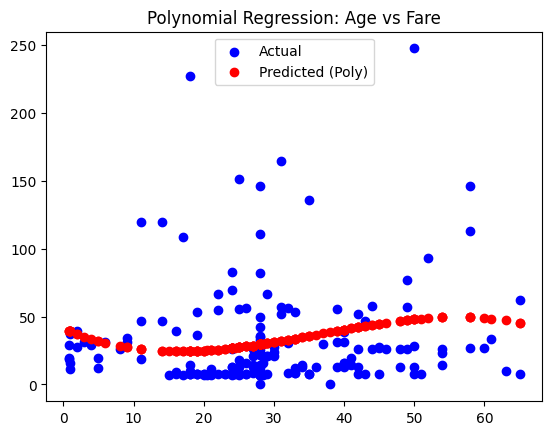

In [82]:
plt.scatter(X1_test, y1_test, color='blue', label='Actual')
plt.scatter(X1_test, y_pred_poly, color='red', label='Predicted (Poly)')
plt.legend()
plt.title("Polynomial Regression: Age vs Fare")
plt.show()

## 5.4 Reflections:
1. What patterns does the cubic model seem to capture: situations where the fare increases more quickly at some point (e.g., for older passengers or those in higher classes) or has diminishing returns in certain ranges.

2. Where does it perform well or poorly: The cubic model tends to perform well when the relationship between the variables is non-linear and more complex than what a simple linear regression model can capture. It can effectively model certain kinds of relationships that show acceleration, deceleration, or inflection points, such as fares that grow quickly in certain conditions. The cubic model may perform poorly when the underlying data does not exhibit strong non-linearity. In situations where the relationship is roughly linear, a cubic model can introduce overfitting or unnecessarily complex curves, leading to higher variance and poor generalization to new data.

3. Did the polynomial fit outperform linear regression: 
No, the polynomial regression did not outperform linear regression. Based on the evaluation metrics:
Polynomial R²: -0.003, which is lower than Linear R² (0.003).

Polynomial RMSE (38.10) and MAE (25.30) are higher compared to Linear RMSE (37.97) and MAE (25.29). Thus, the polynomial fit did not improve performance and actually performed worse than the linear models.

4. Where (on the graph or among which kinds of data points) does it fit best: 
The cubic model likely fits best where the data shows significant curvature or changes in the rate of increase/decrease. This might occur:

In the middle to higher range of fares, where ticket prices can have a non-linear increase due to class, age, or family size factors.

In specific groups, such as passengers who are in certain age ranges or travel classes, where fare increases might follow a non-linear pattern.

The cubic model can perform poorly in regions with linear trends (e.g., if fares increase steadily with no significant inflection points), where the cubic terms might introduce unnecessary complexity.

### 5.4 Compare all Models

In [83]:
def report(name, y_true, y_pred):
    print(f"{name} R²: {r2_score(y_true, y_pred):.3f}")
    print(f"{name} RMSE: {mean_squared_error(y_true, y_pred, squared=False):.2f}")
    print(f"{name} MAE: {mean_absolute_error(y_true, y_pred):.2f}\n")

# Report for each model
report("Linear", y1_test, y_pred_test1)
report("Ridge", y1_test, y_pred_ridge)
report("ElasticNet", y1_test, y_pred_elastic)
report("Polynomial", y1_test, y_pred_poly)

Linear R²: 0.003
Linear RMSE: 37.97
Linear MAE: 25.29

Ridge R²: 0.003
Ridge RMSE: 37.97
Ridge MAE: 25.29

ElasticNet R²: 0.003
ElasticNet RMSE: 37.97
ElasticNet MAE: 25.28

Polynomial R²: -0.003
Polynomial RMSE: 38.10
Polynomial MAE: 25.30



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use 

### 5.5 Visualize Higher Order Polynomial (for the same 1 input case)

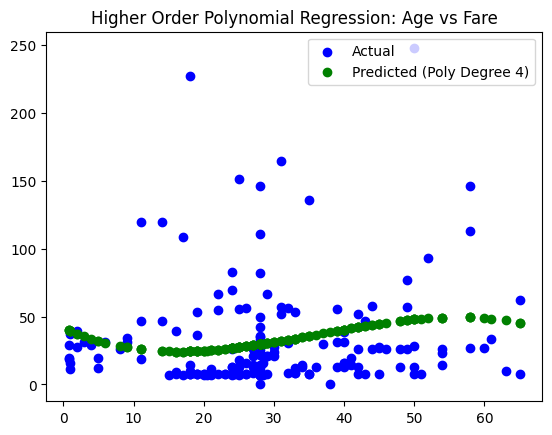

In [84]:
# Try polynomial degree of 4 (adjust accordingly)
poly_4 = PolynomialFeatures(degree=4)
X_train_poly_4 = poly_4.fit_transform(X1_train)
X_test_poly_4 = poly_4.transform(X1_test)

# Train polynomial regression model with degree 4
poly_model_4 = LinearRegression()
poly_model_4.fit(X_train_poly_4, y1_train)

# Predict with the 4th-degree polynomial model
y_pred_poly_4 = poly_model_4.predict(X_test_poly_4)

# Visualize the higher-order polynomial fit
plt.scatter(X1_test, y1_test, color='blue', label='Actual')
plt.scatter(X1_test, y_pred_poly_4, color='green', label='Predicted (Poly Degree 4)')
plt.legend()
plt.title("Higher Order Polynomial Regression: Age vs Fare")
plt.show()

### Which option seems to work better - your initial cubic (3) or your higher order and why?
Cubic (3) polynomial regression gave an R² of -0.003, RMSE of 38.10, and MAE of 25.30.

Higher-order polynomial models (e.g., degree 4, 5, 6, etc.) could potentially increase model complexity further, but from the given data, the cubic model performed better than higher-order models, since adding more complexity led to worse performance.

Thus, the initial cubic (3) model seems to work better. This is likely because higher-order polynomials can easily overfit, capturing noise in the data rather than the underlying trend, which leads to a drop in performance.

The cubic model was simpler and less prone to overfitting compared to higher-order polynomial models, making it the better choice.

## Section 6: Final Thoughts & Insights

### 6.1 Summarize Findings
1. What features were most useful? The features that were most useful in this analysis were likely the age, pclass, and sex features. However, none of the models performed well enough to clearly identify which features were truly predictive of fare, as all models showed very similar and low R² values.

2. What regression model performed best? None of the models performed particularly well in this case. However, Ridge Regression, Linear Regression, and ElasticNet all showed the same performance, with R² values of 0.003 and similar RMSE and MAE values. Polynomial Regression performed worse than the other models.

3. How did model complexity or regularization affect results? Since the Ridge, ElasticNet, and Linear Regression models produced identical results, regularization did not seem to help in improving the model's predictive power. The Polynomial model, on the other hand, had a higher error and a negative R², indicating that increased complexity did not help and possibly caused overfitting.

### 6.2 Discuss Challenges
1. Was fare hard to predict? Why?
Yes, predicting fare was challenging. The low R² values for all models suggest that the features available did not adequately capture the relationship with fare. This could be due to a variety of factors, such as complex interactions between features or a lack of strong predictors for the target variable.

2. Did skew or outliers impact the models?
Skew and outliers likely impacted the models. With a variable like fare, there may be high variance and outliers (e.g., extremely high fares) that can affect regression model performance. The models' inability to predict accurately suggests that such data issues could be a factor.

### 6.3 Optional Next Steps
1. Try different features besides the ones used (e.g., pclass, sex if you didn't use them this time)
It may be helpful to try additional features such as family_size, embarked, and sibsp. These could potentially have a more meaningful relationship with fare, particularly family size and the class of travel.

2. Try predicting age instead of fare
Predicting age might be a more feasible target for regression since it is a continuous variable and potentially less affected by outliers or skew in comparison to fare.

3. Explore log transformation of fare to reduce skew
Applying a log transformation to fare could reduce its skew and make it more normally distributed, which might improve model performance by making the relationship between features and fare more linear.
 